In [93]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import argmax

# Dataset

In [2]:
df = pd.read_csv(r"data_set_butanta.csv", sep=',')
df.drop(['conjunctivitis.y', 'asymptomatic.y', 'abdomen_pain.y',
        'chills.y', 'diarrhea.y', 'missing_smell.y', 'missing_tasty.y',
        'nausea.y', 'body_pain.y', 'cough.y', 'fever.y', 'hard_breathe.y',
        'head_pain.y', 'running_nose.y', 'throat_pain.y'], axis=1, inplace=True)
df.head()

,result_igm,age_category,sex,conjunctivitis.x,asymptomatic.x,abdomen_pain.x,chills.x,diarrhea.x,missing_smell.x,missing_tasty.x,nausea.x,body_pain.x,cough.x,fever.x,hard_breathe.x,head_pain.x,running_nose.x,throat_pain.x
0,0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [3]:
df['age_category'].nunique()

9

In [7]:
df.shape

(1192297, 18)

In [8]:
df['result_igm'].value_counts()

0    1120640
1      71657
Name: result_igm, dtype: int64

???
Deve-se usar vectorizer? Isso iguala qualquer classificação de idade acima de 1 igual a 1.
- https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275


In [3]:
# vectorizer = TfidfVectorizer(binary = True)
# matrix = vectorizer.fit_transform(df)
# X = matrix


In [4]:
# X = df

In [102]:
#features

In [103]:
#features.to_numpy

# Scaler e definição de variáveis

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df.drop('result_igm', axis=1))

In [5]:
X = scaled_X

In [6]:
X

array([[ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [-1.59855278,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       ...,
       [-0.98577422, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.85256148, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665]])

In [7]:
y = df['result_igm']

# Random Forest

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Estatísticas do target y: {Counter(y_train)}")
print(f"Estatísticas do target X: {Counter(y_test)}")

Estatísticas do target y: Counter({0: 784451, 1: 50156})
Estatísticas do target X: Counter({0: 336189, 1: 21501})


In [9]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = logit.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    336189
           1       0.00      0.00      0.00     21501

    accuracy                           0.94    357690
   macro avg       0.47      0.50      0.48    357690
weighted avg       0.88      0.94      0.91    357690



C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [14]:
print(confusion_matrix(y_test, y_pred))

[[336189      0]
 [ 21501      0]]


In [15]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9398892896083201


In [16]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.0


In [17]:
y_score = logit.predict_proba(X_test)
print(y_score)

[[0.95457448 0.04542552]
 [0.94157744 0.05842256]
 [0.94822964 0.05177036]
 ...
 [0.94822964 0.05177036]
 [0.95457448 0.04542552]
 [0.94822964 0.05177036]]


In [18]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [19]:
roc_auc0 = auc(fpr0, tpr0)

In [20]:
thresholds

array([1.36732783, 0.36732783, 0.35978737, ..., 0.01940007, 0.01726876,
       0.01693321])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [21]:
J = tpr0 - fpr0
print(J)

[0.00000000e+00 4.65094647e-05 3.46113954e-05 ... 1.78471039e-05
 5.94903462e-06 0.00000000e+00]


In [22]:
ix = argmax(J)
print(ix)

9519


In [23]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.04542552]
 [0.         0.05842256]
 [0.         0.05177036]
 ...
 [0.         0.05177036]
 [0.         0.04542552]
 [0.         0.05177036]]


# Resultado LOGIT

In [24]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    336189
           1       0.00      0.00      0.00     21501

    accuracy                           0.94    357690
   macro avg       0.47      0.50      0.48    357690
weighted avg       0.88      0.94      0.91    357690

A matriz de confusão: [[336189      0]
 [ 21501      0]]
A acurácia do modelo: 0.9398892896083201
Valor do F1-score: 0.0


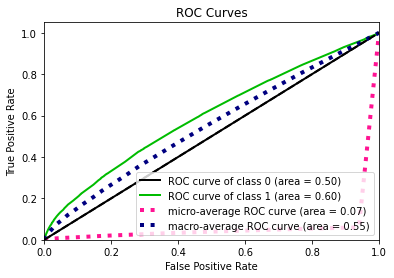

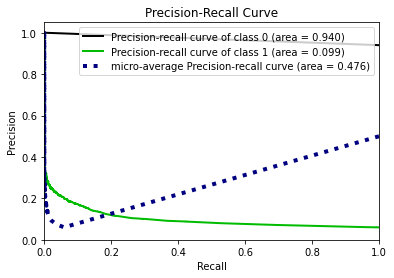

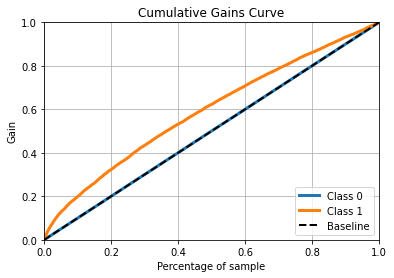

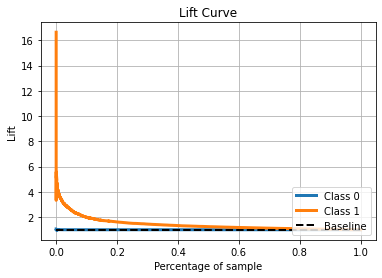

In [25]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

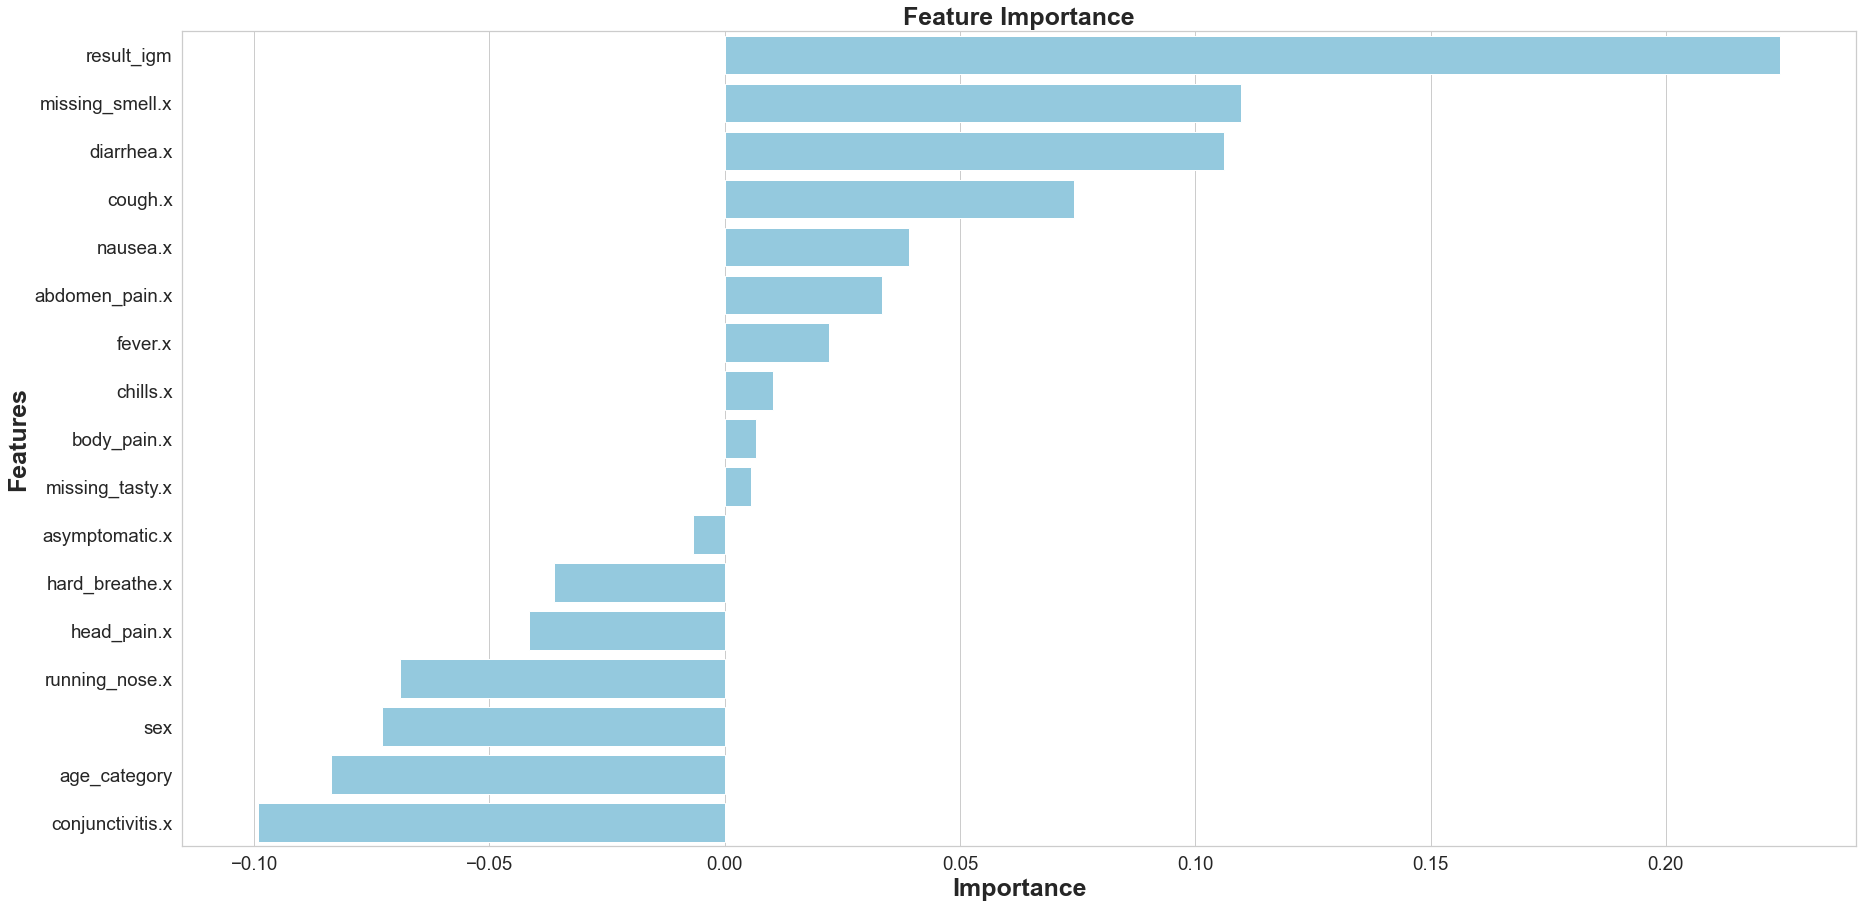

None

,Features,Importance
0,result_igm,0.224246
1,missing_smell.x,0.109628
2,diarrhea.x,0.106046
3,cough.x,0.074118
4,nausea.x,0.039071
5,abdomen_pain.x,0.033377
6,fever.x,0.022224
7,chills.x,0.010161
8,body_pain.x,0.006559
9,missing_tasty.x,0.005673


In [40]:
feats = {}
for feature, importance in zip(df.columns, logit.coef_[0]):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Random Forest (Random Over Sampler)

In [30]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [43]:
logit = LogisticRegression()
logit.fit(X_res, y_res)

LogisticRegression()

In [44]:
y_pred = logit.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80    336189
           1       0.09      0.45      0.14     21501

    accuracy                           0.68    357690
   macro avg       0.52      0.57      0.47    357690
weighted avg       0.90      0.68      0.76    357690



In [46]:
print(confusion_matrix(y_test, y_pred))

[[234010 102179]
 [ 11885   9616]]


In [47]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.6811093404903688


In [48]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.14428039851158322


In [49]:
y_score = logit.predict_proba(X_test)
print(y_score)

[[0.56989466 0.43010534]
 [0.51684755 0.48315245]
 [0.53747761 0.46252239]
 ...
 [0.53747761 0.46252239]
 [0.56989466 0.43010534]
 [0.53747761 0.46252239]]


In [50]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [51]:
roc_auc0 = auc(fpr0, tpr0)

In [52]:
thresholds

array([1.90137354, 0.90137354, 0.89739101, ..., 0.24232949, 0.22356769,
       0.21766989])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [53]:
J = tpr0 - fpr0
print(J)

[0.00000000e+00 4.65094647e-05 3.75859127e-05 ... 1.78471039e-05
 5.94903462e-06 0.00000000e+00]


In [54]:
ix = argmax(J)
print(ix)

9710


In [55]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.43010534]
 [0.         0.48315245]
 [0.         0.46252239]
 ...
 [0.         0.46252239]
 [0.         0.43010534]
 [0.         0.46252239]]


In [56]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 784451, 1: 784451})
Testing target statistics: Counter({0: 336189, 1: 21501})


In [57]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

NameError: name 'build_and_test' is not defined

# Resultado LOGIT
- (Random OverSample)

In [58]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )


A matriz de classificação:               precision    recall  f1-score   support

           0       0.95      0.70      0.80    336189
           1       0.09      0.45      0.14     21501

    accuracy                           0.68    357690
   macro avg       0.52      0.57      0.47    357690
weighted avg       0.90      0.68      0.76    357690

A matriz de confusão: [[234010 102179]
 [ 11885   9616]]
A acurácia do modelo: 0.6811093404903688
Valor do F1-score: 0.14428039851158322


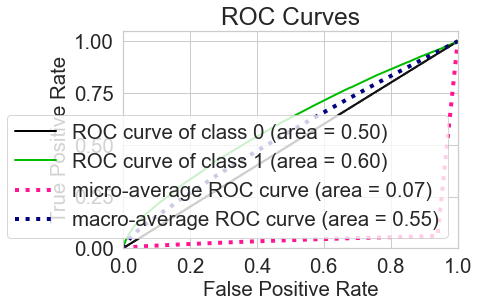

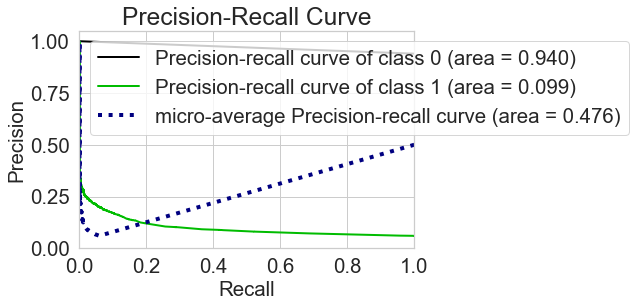

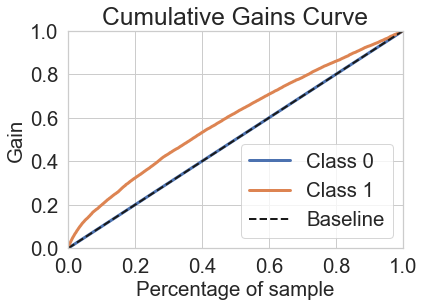

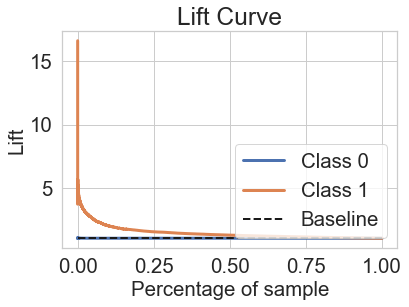

In [59]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# PCA

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=15)
pca_df = pca.fit_transform(scaled_X)
variancia = round(sum(pca.explained_variance_ratio_), 2)
variancia

0.97

In [55]:
y = df.result_igm
type(y)

pandas.core.series.Series

In [56]:
pca_df[:,:9].shape

(1192297, 9)

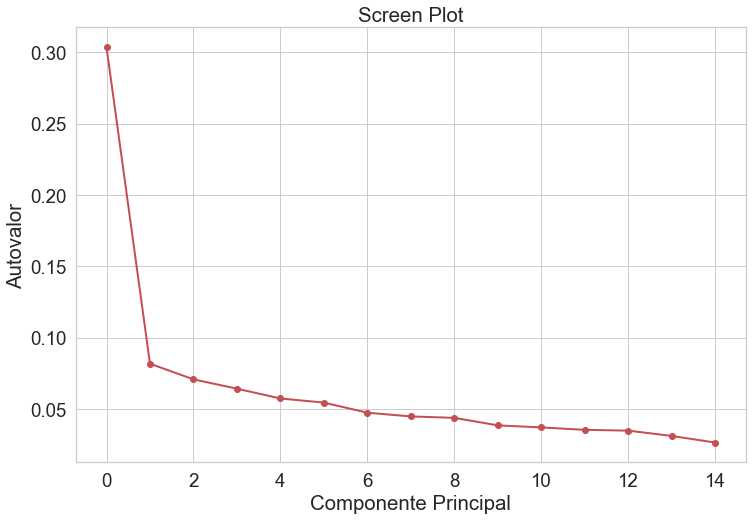

In [57]:
import numpy as np
fig = plt.figure(figsize=(12,8))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Screen Plot')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')

plt.show()

# Random Forest Smote

In [62]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)
print(f"Estatistica de treinamento do target X: {Counter(y_train)}")
print(f"Estatistica de treinamento do target y: {Counter(y_test)}")

Estatistica de treinamento do target X: Counter({0: 549394, 1: 548837})
Estatistica de treinamento do target y: Counter({1: 235614, 0: 235057})


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [65]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = logit.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369679
           1       0.00      0.00      0.00     23780

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459



C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [69]:
print(confusion_matrix(y_test, y_pred))

[[369679      0]
 [ 23780      0]]


In [70]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9395616824116363


In [71]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.0


In [72]:
y_score = logit.predict_proba(X_test)
print(y_score)

[[0.94827078 0.05172922]
 [0.89798432 0.10201568]
 [0.94987065 0.05012935]
 ...
 [0.96156323 0.03843677]
 [0.94827078 0.05172922]
 [0.94101656 0.05898344]]


In [73]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [74]:
roc_auc0 = auc(fpr0, tpr0)

In [75]:
thresholds

array([1.37584518, 0.37584518, 0.37257762, ..., 0.0196068 , 0.01948219,
       0.01593115])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [76]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -2.70504952e-06  3.93470951e-05 ...  1.62302971e-05
  1.08201981e-05  0.00000000e+00]


In [77]:
ix = argmax(J)
print(ix)

10504


In [78]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.05172922]
 [0.         0.10201568]
 [0.         0.05012935]
 ...
 [0.         0.03843677]
 [0.         0.05172922]
 [0.         0.05898344]]


# Resultado Random Forest
 - Smote

In [79]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369679
           1       0.00      0.00      0.00     23780

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

A matriz de confusão: [[369679      0]
 [ 23780      0]]
A acurácia do modelo: 0.9395616824116363
Valor do F1-score: 0.0


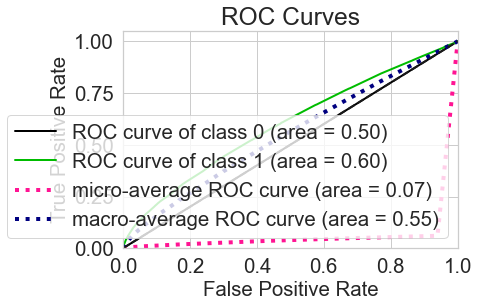

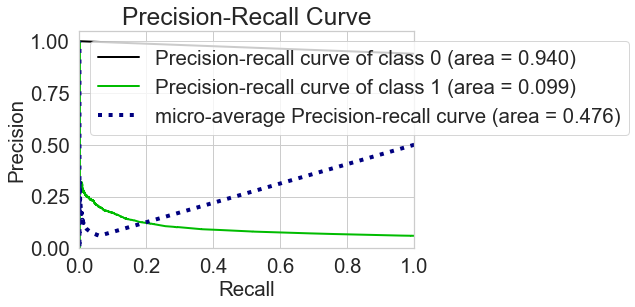

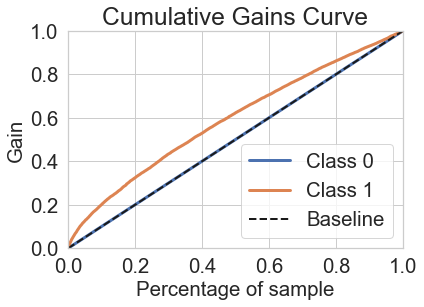

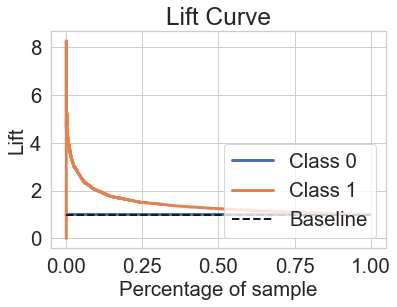

In [80]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# PCA e Laboratório

In [81]:

import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Construindo PCA
    pca = PCA(n_components=15)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Construindo Modelo
    if class_weight:
        model = LogisticRegression()
    else:
        model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    # Teste do modelo
    y_pred = model.predict(X_te)
    print('Resultado da prescisão %s' % precision_score(y_te, y_pred))
    print('Resultado do recall %s' % recall_score(y_te, y_pred))
    print('Resultado F1 %s' % f1_score(y_te, y_pred))
    print('Resultado acurácia %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculando o melhor threashold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # valor da maior estatística 
        best_threshold = thresholds[ix]
        # ajuste de acordo com o threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score1)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score1)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print
    print(classification_report(y_te,y_pred))
    print(confusion_matrix(y_test, y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

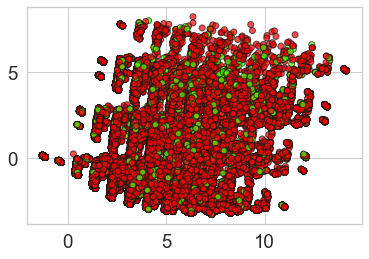

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9395616824116363


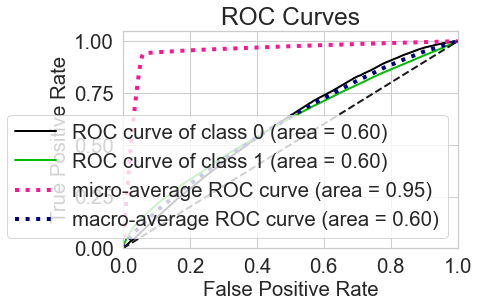

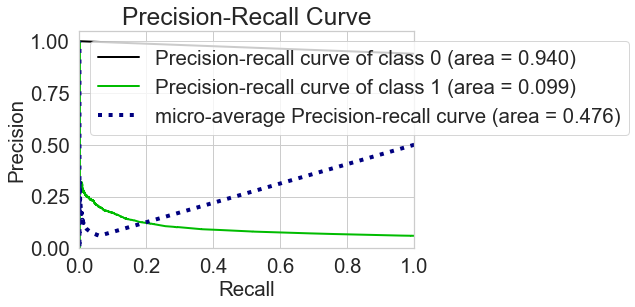

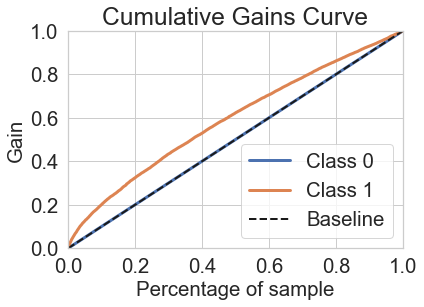

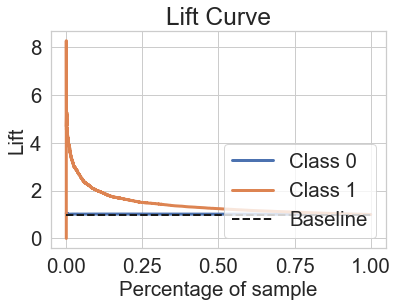

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369679
           1       0.00      0.00      0.00     23780

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369679      0]
 [ 23780      0]]


In [82]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)

- Oversample

In [83]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750961, 1: 750961})
Testing target statistics: Counter({0: 369679, 1: 23780})


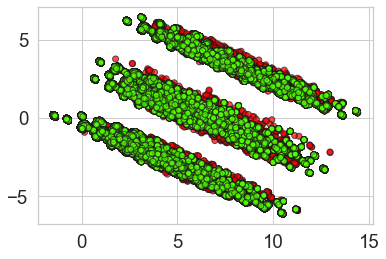

Resultado da prescisão 0.08627735087262307
Resultado do recall 0.4457106812447435
Resultado F1 0.14456993207300106
Resultado acurácia 0.6812120195496862


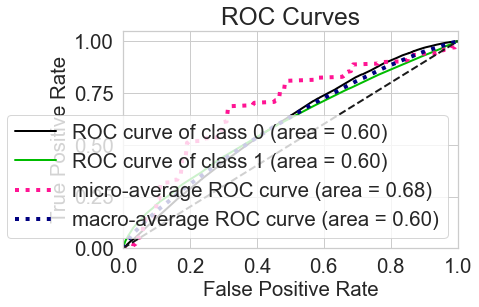

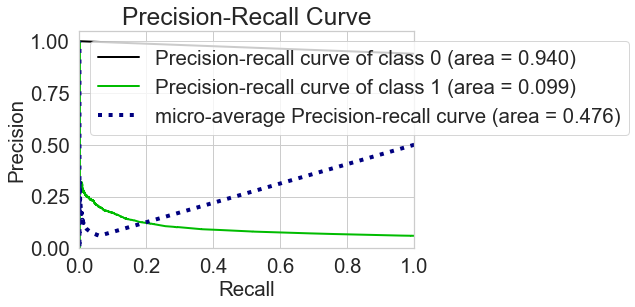

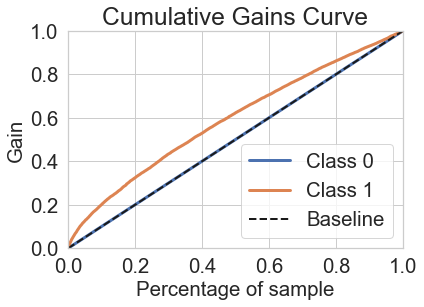

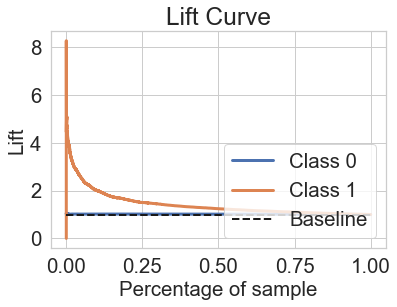

              precision    recall  f1-score   support

           0       0.95      0.70      0.80    369679
           1       0.09      0.45      0.14     23780

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.47    393459
weighted avg       0.90      0.68      0.76    393459

[[257430 112249]
 [ 13181  10599]]


In [84]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

- SMOTE

In [85]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750961, 1: 750961})
Testing target statistics: Counter({0: 369679, 1: 23780})


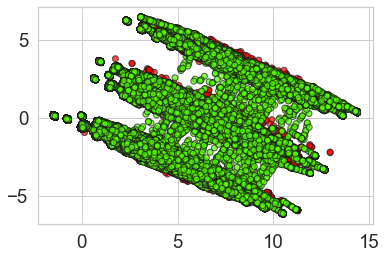

Resultado da prescisão 0.08643034581944171
Resultado do recall 0.4447855340622372
Resultado F1 0.14473576178877362
Resultado acurácia 0.6822998076038418


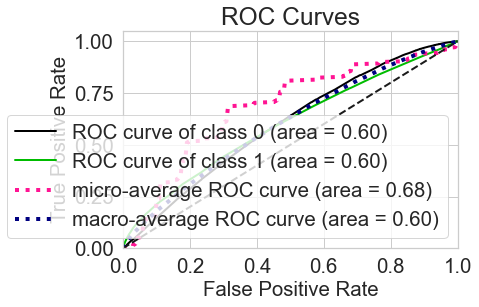

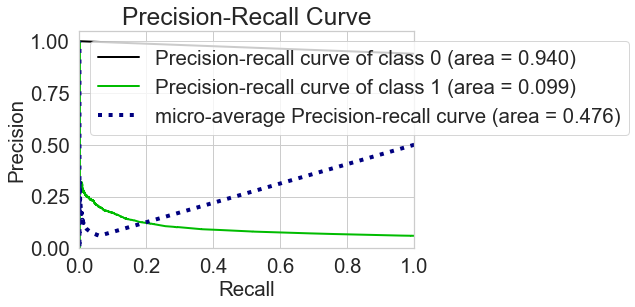

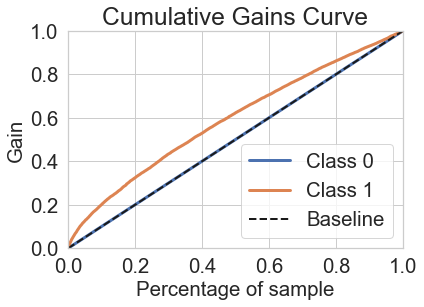

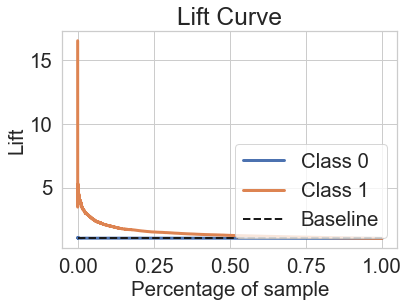

              precision    recall  f1-score   support

           0       0.95      0.70      0.80    369679
           1       0.09      0.44      0.14     23780

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.47    393459
weighted avg       0.90      0.68      0.77    393459

[[257880 111799]
 [ 13203  10577]]


In [86]:
roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_test, y_res, y_test)

In [87]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 47877, 1: 47877})
Testing target statistics: Counter({0: 369679, 1: 23780})


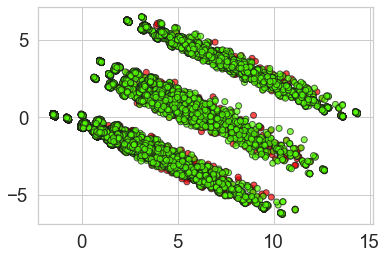

Resultado da prescisão 0.0861344707853437
Resultado do recall 0.4475189234650967
Resultado F1 0.14446382635019103
Resultado acurácia 0.6796438764903078


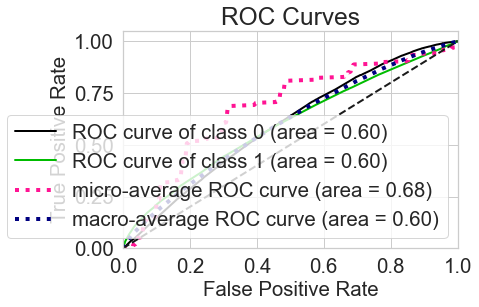

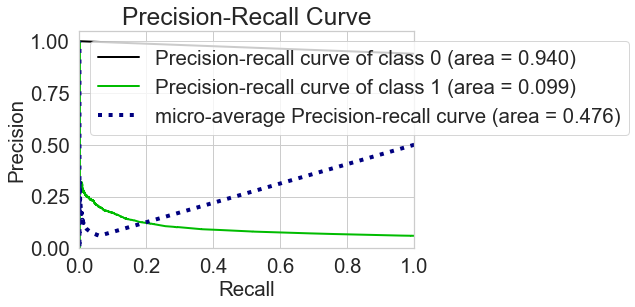

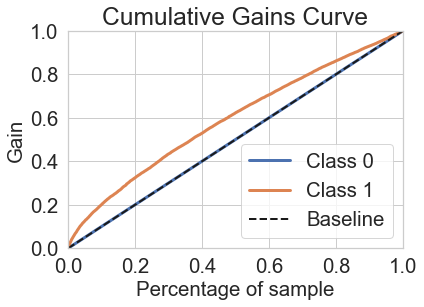

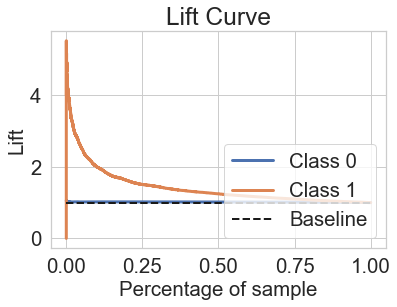

              precision    recall  f1-score   support

           0       0.95      0.69      0.80    369679
           1       0.09      0.45      0.14     23780

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.47    393459
weighted avg       0.90      0.68      0.76    393459

[[256770 112909]
 [ 13138  10642]]


In [88]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

In [89]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 47877, 1: 47877})
Testing target statistics: Counter({0: 369679, 1: 23780})


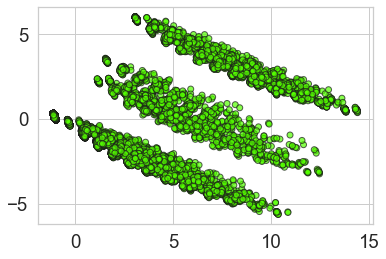

Resultado da prescisão 0.08025764605197964
Resultado do recall 0.37464255677039526
Resultado F1 0.13219571910820938
Resultado acurácia 0.7027212492280008


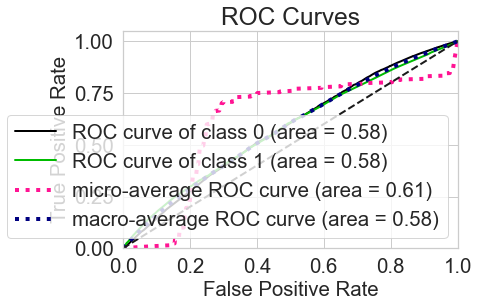

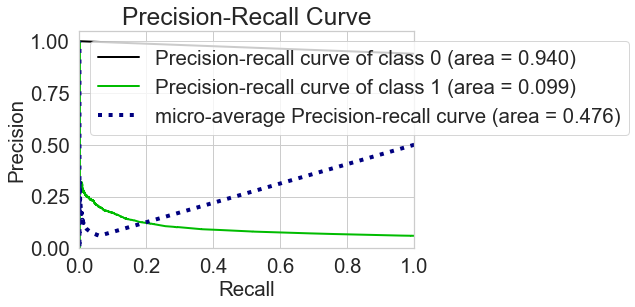

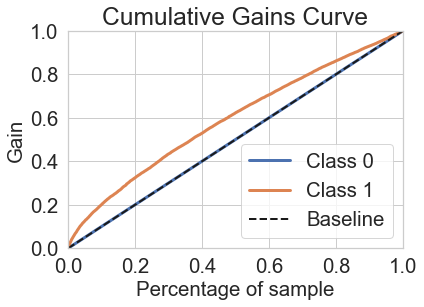

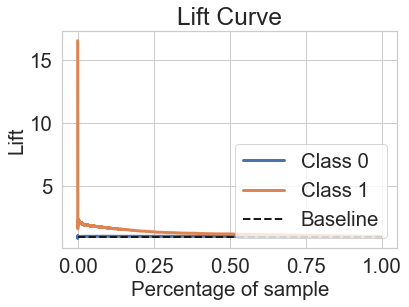

              precision    recall  f1-score   support

           0       0.95      0.72      0.82    369679
           1       0.08      0.37      0.13     23780

    accuracy                           0.70    393459
   macro avg       0.51      0.55      0.48    393459
weighted avg       0.89      0.70      0.78    393459

[[267583 102096]
 [ 14871   8909]]


In [90]:
roc_auc_nm,fpr_nm,tpr_nm, _  = build_and_test(X_res, X_test, y_res, y_test)

In [91]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(15, Counter({0: 750961, 1: 47877}))

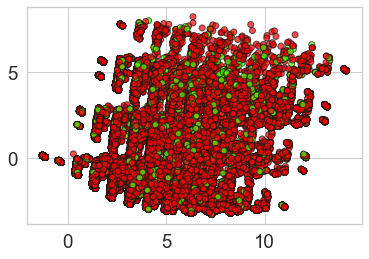

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9395616824116363


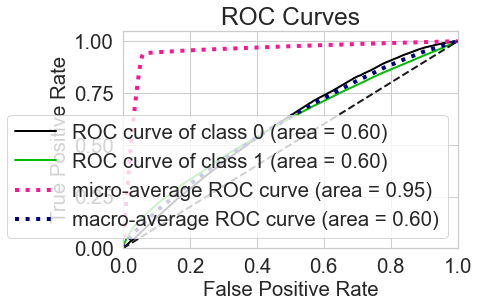

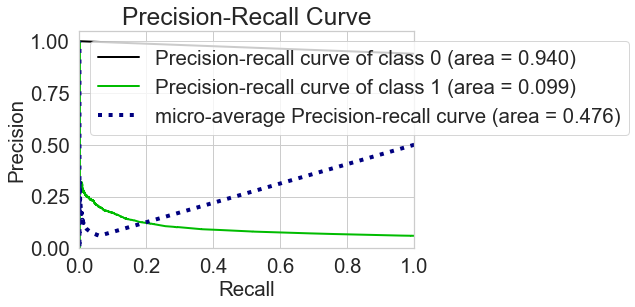

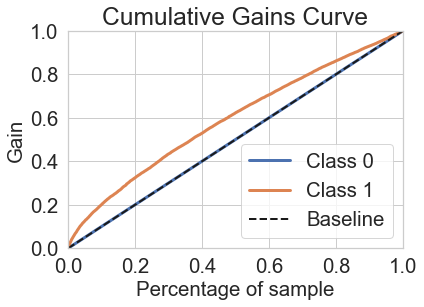

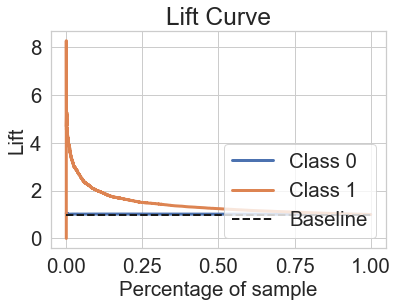

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369679
           1       0.00      0.00      0.00     23780

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369679      0]
 [ 23780      0]]


In [92]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

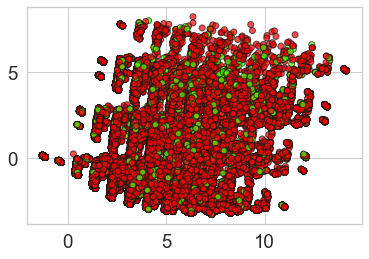

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9395616824116363


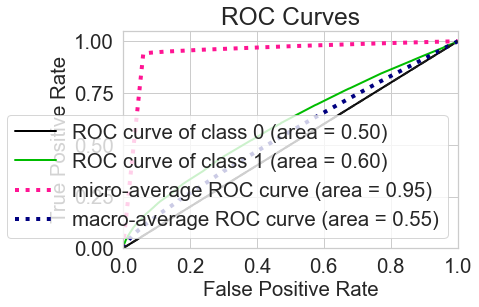

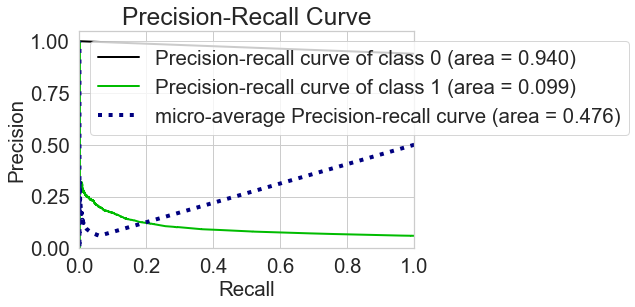

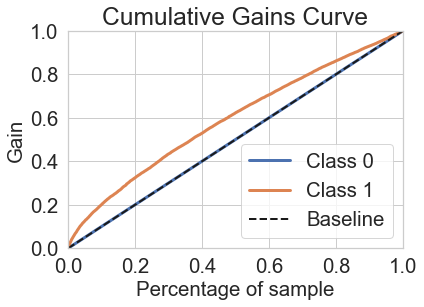

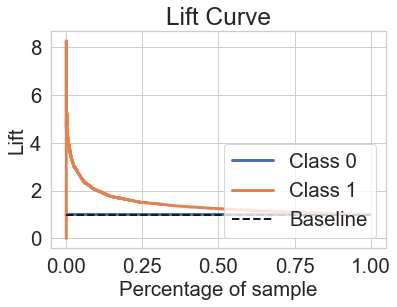

C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desenvolvedor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369679
           1       0.00      0.00      0.00     23780

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369679      0]
 [ 23780      0]]
Best Treshold: 0.06330845032837813


In [93]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

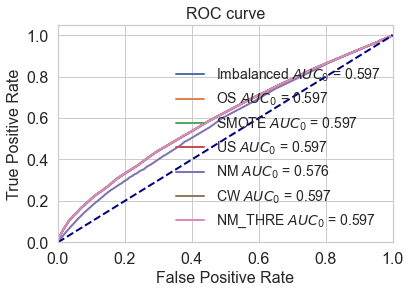

In [94]:
plt.plot(fpr_imb, tpr_imb, lw=2, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros, tpr_ros, lw=2, label='OS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_smote, tpr_smote, lw=2, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus, tpr_rus, lw=2, label='US $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_nm, tpr_nm, lw=2, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=2, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=2, label='NM_THRE $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()